<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/World_Happiness_Analysis_%26_Covid_19_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#imports 
import pandas as pd #dataframes 
import numpy as np #linear algebra / arrays
import seaborn as sns #visualization 
from matplotlib import pyplot as plt #creating data plots
import statsmodels.api as sm #statistical analysis
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/2019.csv')

In [ ]:
#view head of data
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#Rename columns 
df=df.rename(columns={'Country or region': 'Country','Healthy life expectancy':'Life expectancy'})

df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#Look at shape of data and check for missing values 

#shape of data 
print(df.shape)

df.isnull().sum()

(156, 9)


Overall rank                    0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Life expectancy                 0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
#ten happieset countries
df.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [ ]:
#ten least happiest countries 
df.tail(10)

,Overall rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [ ]:
#What makes them happy or sad? 

#put the head and tail into seperate dataframes 
df_head = df.head(10)
df_tail = df.tail(10)

#concatenate the dataframes so we can look at them with visualization tools 
concat_df = pd.concat([df_head, df_tail])

print(concat_df)

     Overall rank  ... Perceptions of corruption
0               1  ...                     0.393
1               2  ...                     0.410
2               3  ...                     0.341
3               4  ...                     0.118
4               5  ...                     0.298
5               6  ...                     0.343
6               7  ...                     0.373
7               8  ...                     0.380
8               9  ...                     0.308
9              10  ...                     0.226
146           147  ...                     0.110
147           148  ...                     0.100
148           149  ...                     0.141
149           150  ...                     0.089
150           151  ...                     0.077
151           152  ...                     0.411
152           153  ...                     0.147
153           154  ...                     0.025
154           155  ...                     0.035
155           156  .

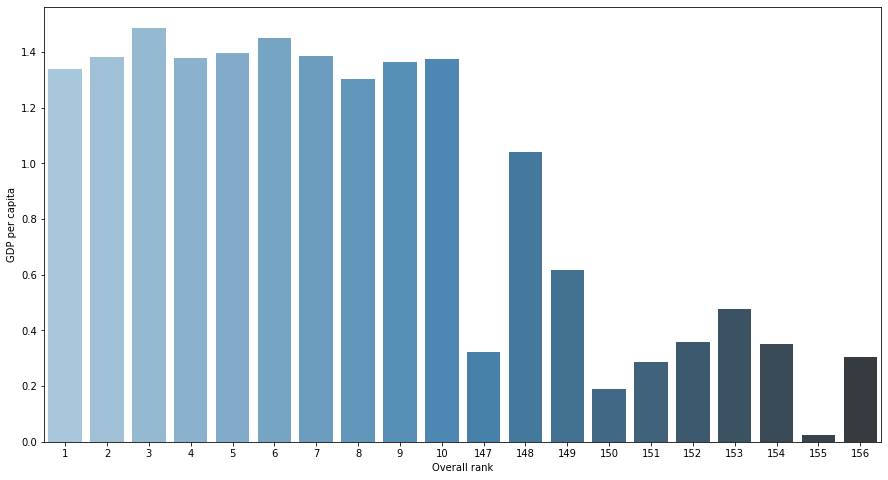

In [ ]:
#Display GDP of top 10 and bottom 10 countries 

plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read. 
ax = sns.barplot(x="Overall rank", y="GDP per capita", data=concat_df,
                 palette="Blues_d")

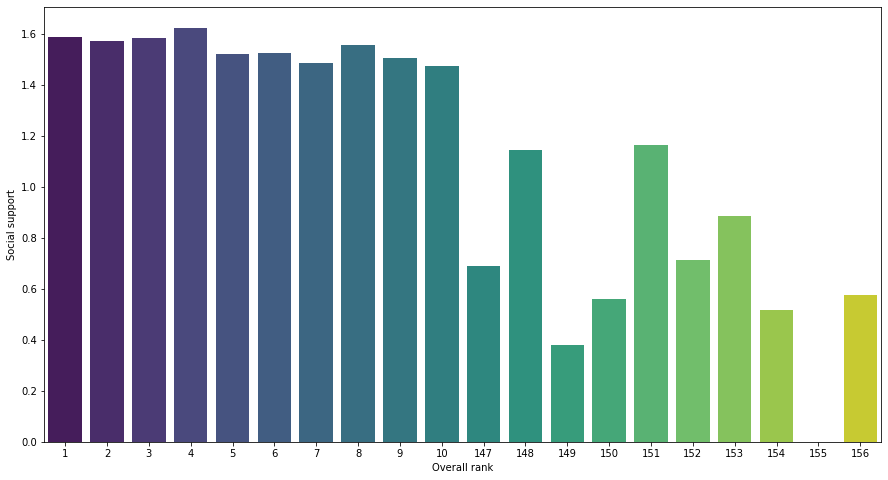

In [ ]:
#Looking at social support

plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read. 
ax = sns.barplot(x="Overall rank", y="Social support", data=concat_df,
                 palette = "viridis")

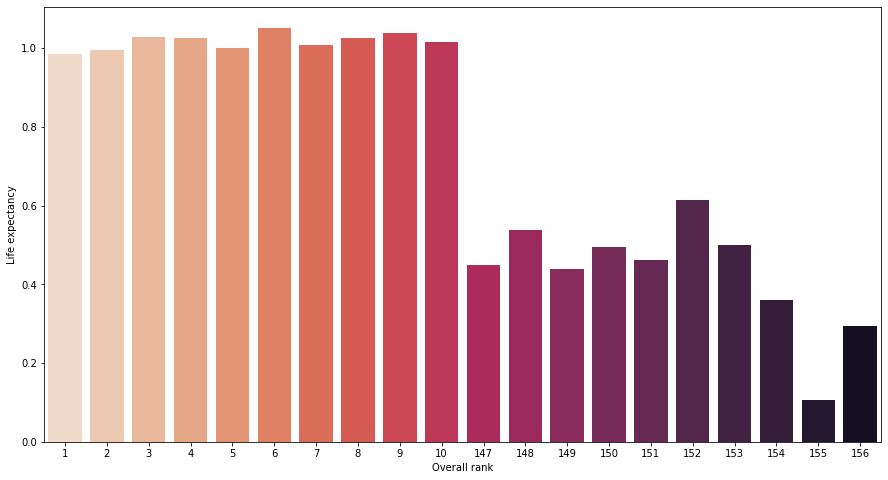

In [ ]:
#Looking at life expectancy 


plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read. 
ax = sns.barplot(x="Overall rank", y="Life expectancy", data=concat_df,
                 palette = "rocket_r")


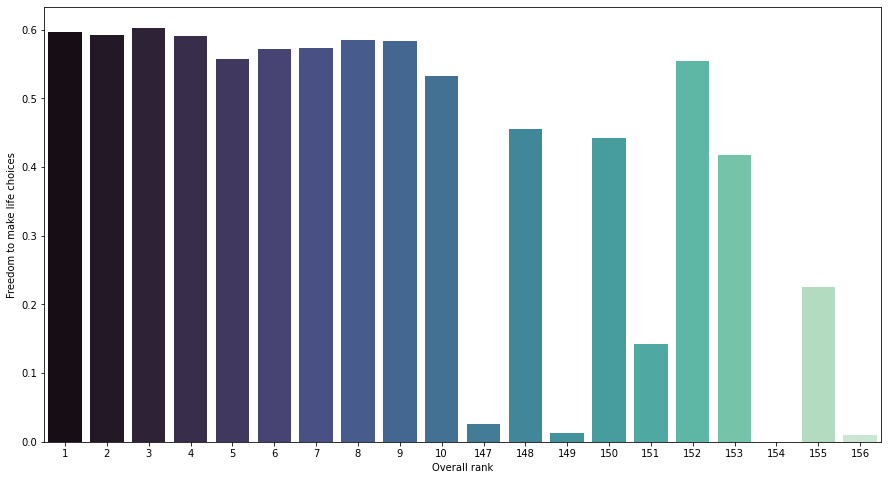

In [ ]:
#Looking at Freedom to make life choices 


plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read. 
ax = sns.barplot(x="Overall rank", y="Freedom to make life choices", data=concat_df,
                 palette = "mako")

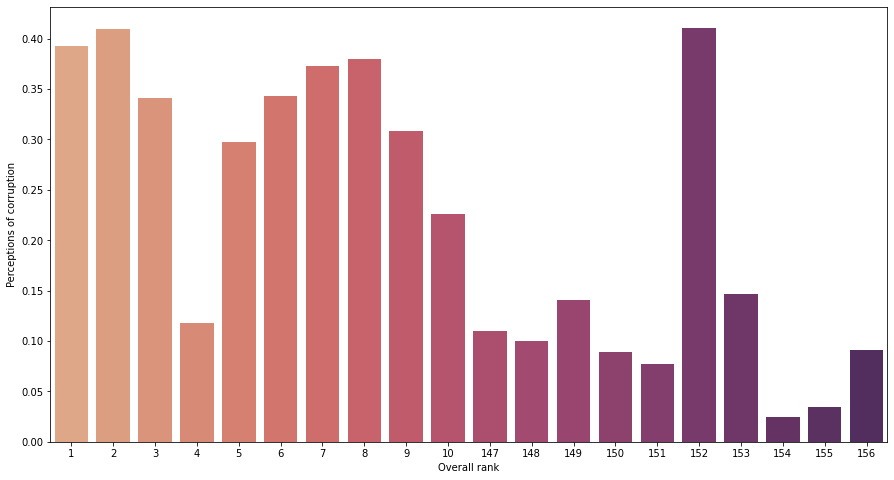

In [ ]:
#Looking at Perceptions of corruption


plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read. 
ax = sns.barplot(x="Overall rank", y="Perceptions of corruption", data=concat_df,
                 palette = "flare")

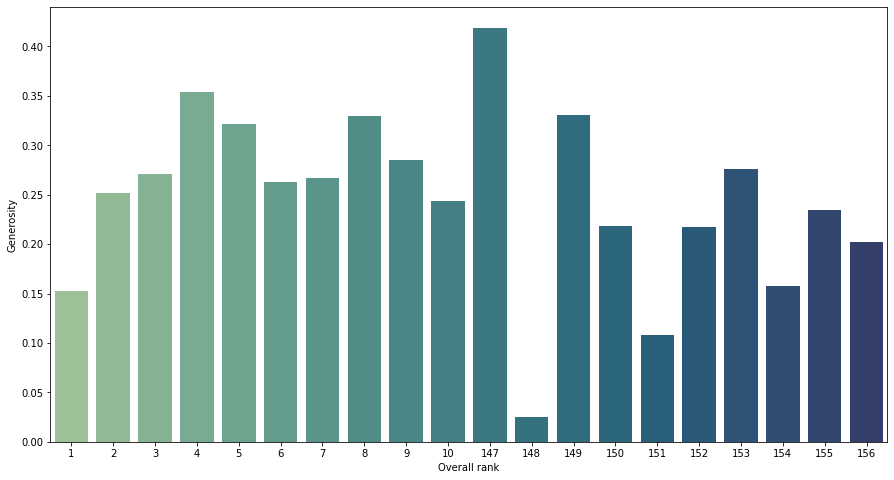

In [ ]:
#Looking at Generosity


plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read. 
ax = sns.barplot(x="Overall rank", y="Generosity", data=concat_df,
                 palette = "crest")

In [ ]:
#Looking for correlations

corr = df.corr(method='pearson')
print(corr)

                              Overall rank  ...  Perceptions of corruption
Overall rank                      1.000000  ...                  -0.351959
Score                            -0.989096  ...                   0.385613
GDP per capita                   -0.801947  ...                   0.298920
Social support                   -0.767465  ...                   0.181899
Life expectancy                  -0.787411  ...                   0.295283
Freedom to make life choices     -0.546606  ...                   0.438843
Generosity                       -0.047993  ...                   0.326538
Perceptions of corruption        -0.351959  ...                   1.000000

[8 rows x 8 columns]


In [ ]:
df_revised = df.drop(columns=['Overall rank'])
corr = df_revised.corr(method='pearson')
print(corr)

                                 Score  ...  Perceptions of corruption
Score                         1.000000  ...                   0.385613
GDP per capita                0.793883  ...                   0.298920
Social support                0.777058  ...                   0.181899
Life expectancy               0.779883  ...                   0.295283
Freedom to make life choices  0.566742  ...                   0.438843
Generosity                    0.075824  ...                   0.326538
Perceptions of corruption     0.385613  ...                   1.000000

[7 rows x 7 columns]


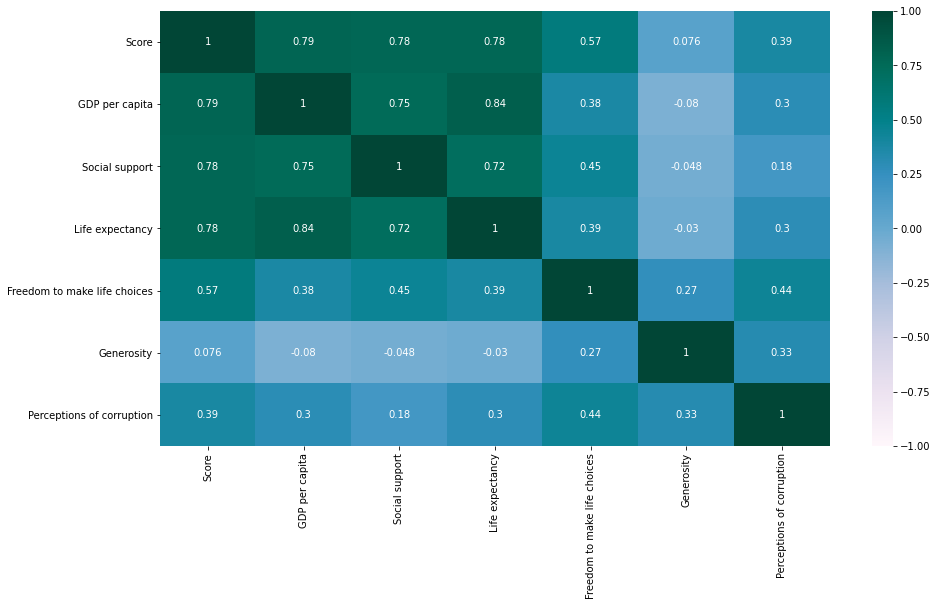

In [ ]:
#heat map of correlation

plt.figure(figsize=(15,8)) #Adjust size of plot so it can be read.
ax = sns.heatmap(df_revised.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap = 'PuBuGn')

In [ ]:
#Import Covid-19 data 

df_pop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/worldometer_data.csv')

#preview Covid dataframe 
df_pop.tail(50)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
159,Channel Islands,Europe,174022.0,597,NaN,47.0,NaN,533.0,NaN,17.0,NaN,3431.0,270.00,30721.0,176535.0,NaN
160,Guyana,South America,786936.0,538,NaN,22.0,NaN,189.0,NaN,327.0,2.0,684.0,28.00,5165.0,6563.0,Americas
161,Tanzania,Africa,59886383.0,509,NaN,21.0,NaN,183.0,NaN,305.0,7.0,8.0,0.40,NaN,NaN,Africa
162,Taiwan,Asia,23821199.0,477,NaN,7.0,NaN,443.0,NaN,27.0,NaN,20.0,0.30,82737.0,3473.0,WesternPacific
163,Comoros,Africa,871326.0,396,NaN,7.0,NaN,340.0,NaN,49.0,NaN,454.0,8.00,NaN,NaN,Africa
164,Burundi,Africa,11922216.0,395,NaN,1.0,NaN,304.0,NaN,90.0,NaN,33.0,0.08,15614.0,1310.0,Africa
165,Myanmar,Asia,54446389.0,357,NaN,6.0,NaN,308.0,NaN,43.0,NaN,7.0,0.10,122290.0,2246.0,South-EastAsia
166,Mauritius,Africa,1271985.0,344,NaN,10.0,NaN,334.0,NaN,0.0,NaN,270.0,8.00,205285.0,161389.0,Africa
167,Isle of Man,Europe,85078.0,336,NaN,24.0,NaN,312.0,NaN,0.0,NaN,3949.0,282.00,8627.0,101401.0,NaN
168,Mongolia,Asia,3283344.0,293,NaN,NaN,NaN,260.0,NaN,33.0,1.0,89.0,NaN,38334.0,11675.0,WesternPacific


In [ ]:
#preview world populations dataframe 

df_pop.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
df_pop["Country/Region"].replace({"USA": "United States"}, inplace = True)

df_pop["Country/Region"].replace({"Czechia" : "Czech Republic"}, inplace = True)

df_pop.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,United States,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
#rename column
df_pop.rename(columns={"Country/Region": "Country"}, inplace = True)

#drop unwanted columns
dataframe = df_pop.drop(['Continent', 'NewCases', 'NewDeaths', 'NewRecovered', 'WHO Region'], axis=1)

dataframe.head(50)

,Country,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,United States,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0
1,Brazil,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0
2,India,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0
3,Russia,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0
4,South Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0
5,Mexico,1.290662e+08,462690,50517.0,308848.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0
6,Peru,3.301632e+07,455409,20424.0,310337.0,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0
7,Chile,1.913251e+07,366671,9889.0,340168.0,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0
8,Colombia,5.093626e+07,357710,11939.0,192355.0,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0
9,Spain,4.675665e+07,354530,28500.0,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0


In [ ]:
#Merge World Happiness Data & Covid

Happiness = pd.merge(df, dataframe, how="outer", on=["Country"])

#merge w/ covid data frame, create new data frame so I only have the top 20 countries.
Happiness_top = Happiness.head(20)
#view
Happiness_top.head(20)

,Overall rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5541604.0,7532.0,331.0,6980.0,221.0,NaN,1359.0,60.0,389500.0,70287.0
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5794279.0,14306.0,617.0,12787.0,902.0,2.0,2469.0,106.0,1654512.0,285542.0
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5425471.0,9468.0,256.0,8857.0,355.0,3.0,1745.0,47.0,472841.0,87152.0
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,341465.0,1930.0,10.0,1825.0,95.0,NaN,5652.0,29.0,149693.0,438385.0
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,17138756.0,56982.0,6153.0,NaN,NaN,37.0,3325.0,359.0,1079860.0,63007.0
5,6.0,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,8660952.0,36108.0,1985.0,31600.0,2523.0,23.0,4169.0,229.0,822764.0,94997.0
6,7.0,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,10105596.0,81967.0,5766.0,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0
7,8.0,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,5002100.0,1569.0,22.0,1524.0,23.0,NaN,314.0,4.0,486943.0,97348.0
8,9.0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,37775022.0,118561.0,8966.0,103106.0,6489.0,2263.0,3139.0,237.0,4319172.0,114339.0
9,10.0,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,9011577.0,21696.0,719.0,19596.0,1381.0,25.0,2408.0,80.0,937275.0,104008.0


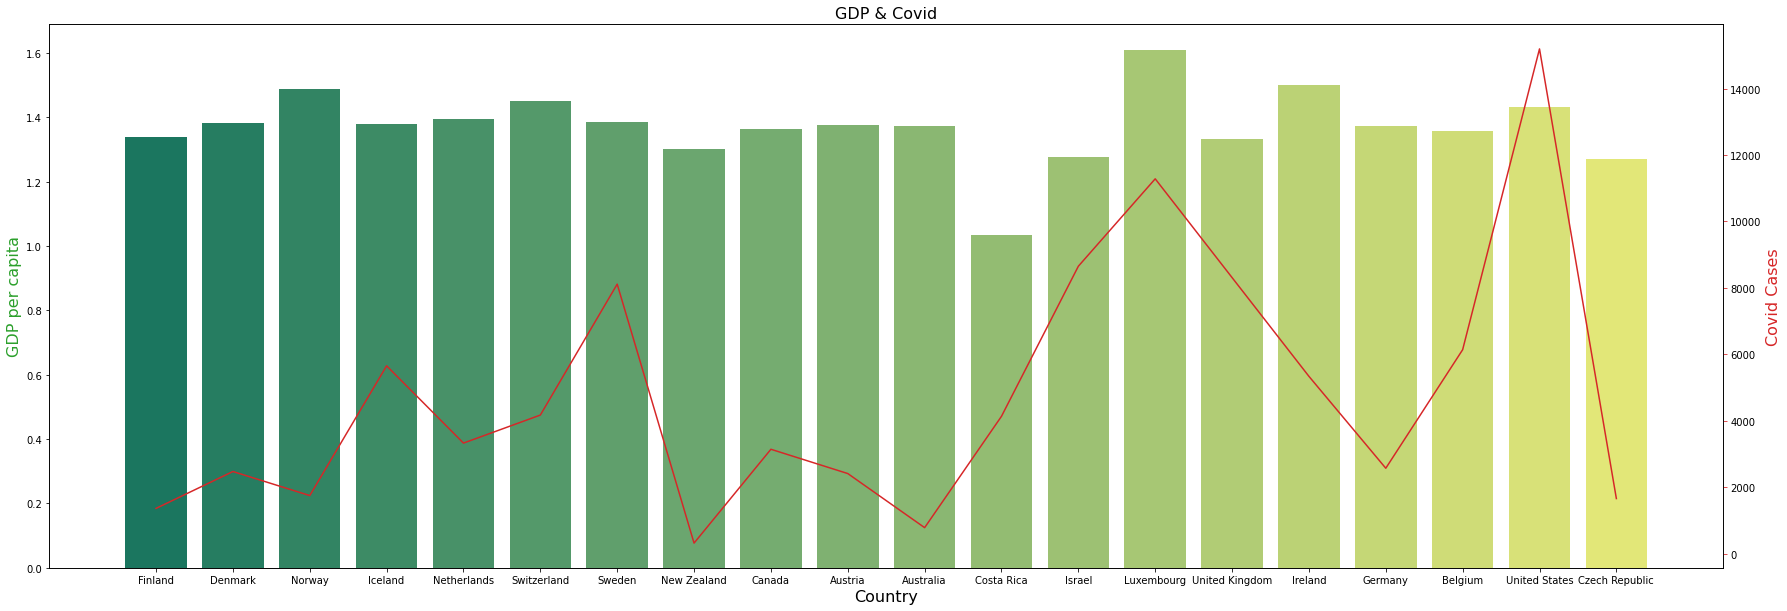

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
color = 'tab:green'
ax1.set_title('GDP & Covid', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('GDP', fontsize=16, color=color)
ax2 = sns.barplot(x='Country', y='GDP per capita', data = Happiness_top, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Covid Cases', fontsize=16, color=color)
ax2 = sns.lineplot(x='Country', y='Tot Cases/1M pop', data = Happiness_top, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

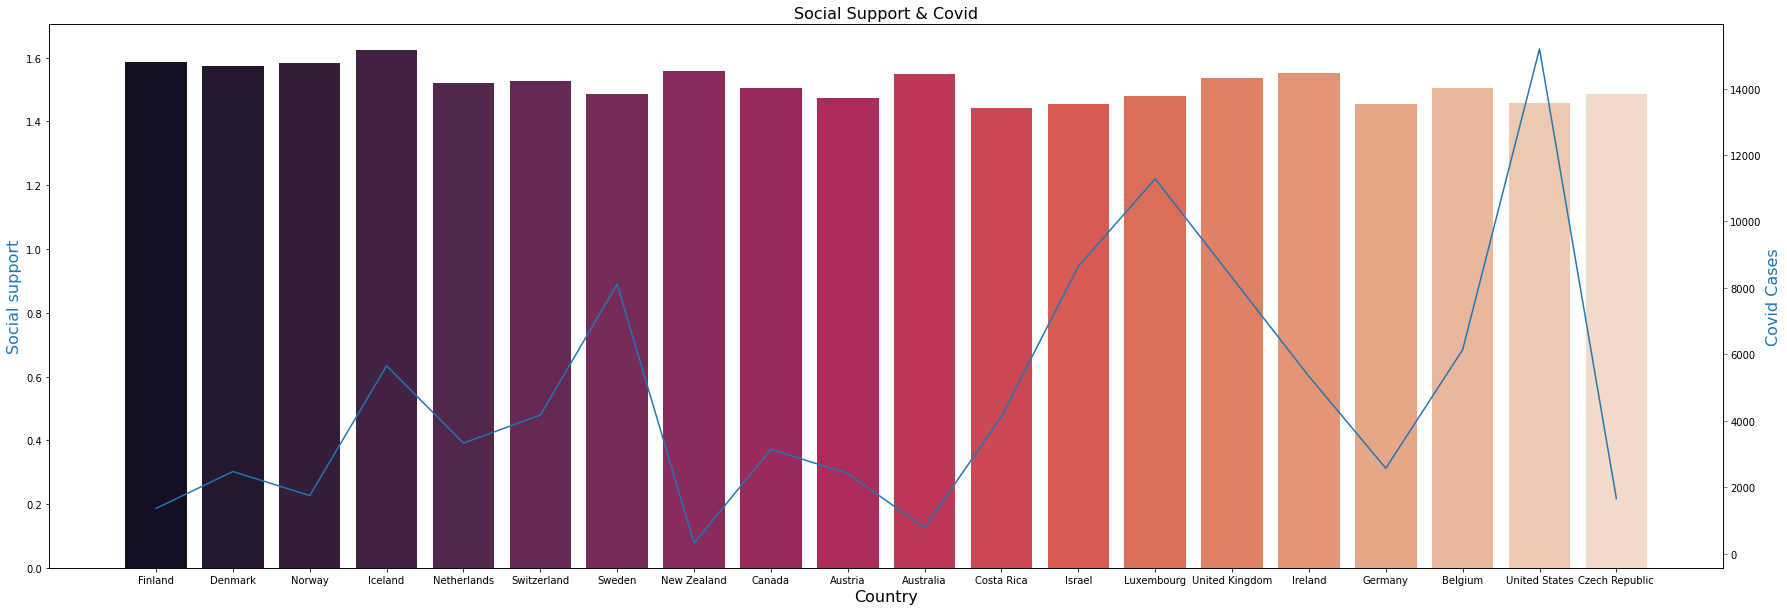

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
color = 'tab:blue'
ax1.set_title('Social Support & Covid', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('Social support', fontsize=16, color=color)
ax2 = sns.barplot(x='Country', y='Social support', data = Happiness_top, palette='rocket')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Covid Cases', fontsize=16, color=color)
ax2 = sns.lineplot(x='Country', y='Tot Cases/1M pop', data = Happiness_top, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()


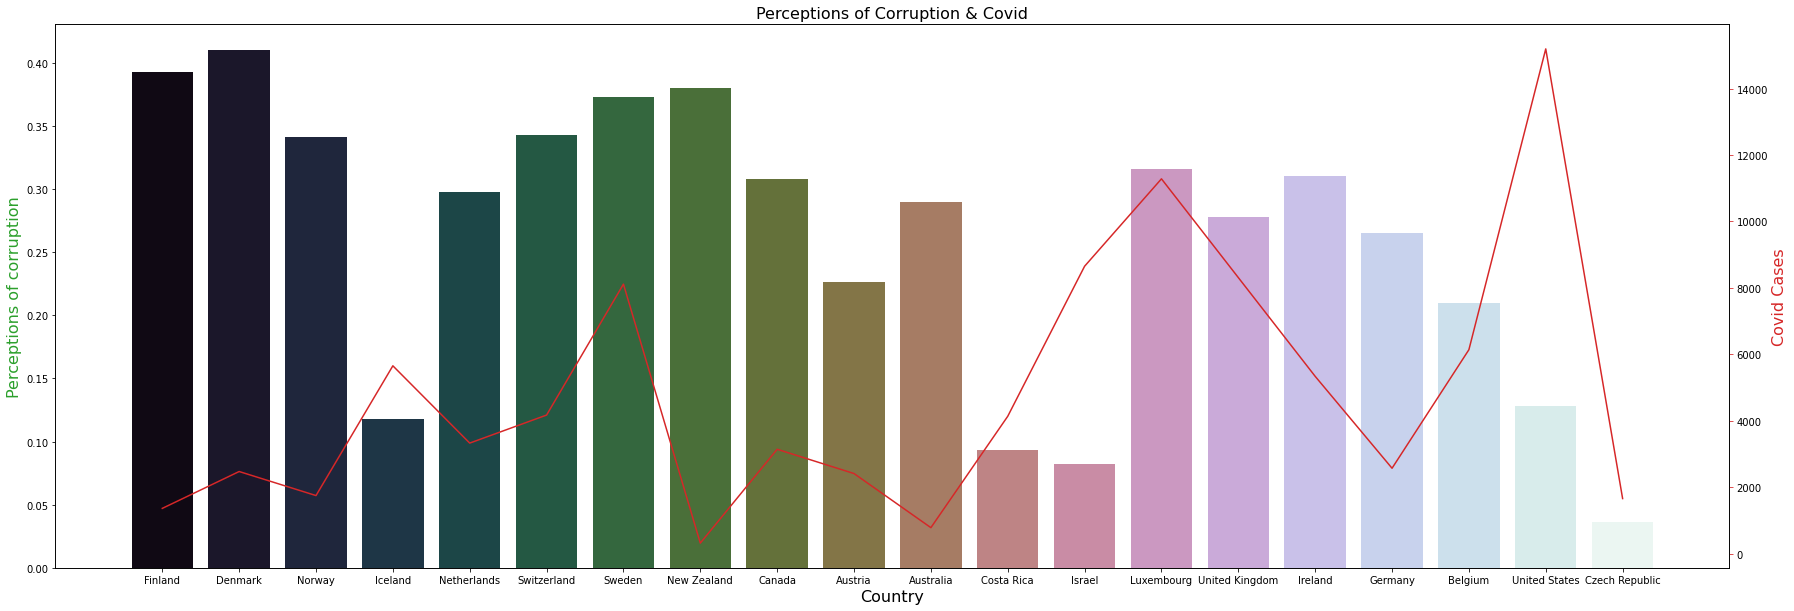

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
color = 'tab:green'
ax1.set_title('Perceptions of Corruption & Covid', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('Perceptions of corruption', fontsize=16, color=color)
ax2 = sns.barplot(x='Country', y='Perceptions of corruption', data = Happiness_top, palette='cubehelix')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Covid Cases', fontsize=16, color=color)
ax2 = sns.lineplot(x='Country', y='Tot Cases/1M pop', data = Happiness_top, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [ ]:
Happiness_t = Happiness.head(10)
Happiness_b = Happiness.tail(10)

Happiness_t.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5541604.0,7532.0,331.0,6980.0,221.0,NaN,1359.0,60.0,389500.0,70287.0
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5794279.0,14306.0,617.0,12787.0,902.0,2.0,2469.0,106.0,1654512.0,285542.0
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5425471.0,9468.0,256.0,8857.0,355.0,3.0,1745.0,47.0,472841.0,87152.0
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,341465.0,1930.0,10.0,1825.0,95.0,NaN,5652.0,29.0,149693.0,438385.0
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,17138756.0,56982.0,6153.0,NaN,NaN,37.0,3325.0,359.0,1079860.0,63007.0
5,6.0,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,8660952.0,36108.0,1985.0,31600.0,2523.0,23.0,4169.0,229.0,822764.0,94997.0
6,7.0,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,10105596.0,81967.0,5766.0,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0
7,8.0,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,5002100.0,1569.0,22.0,1524.0,23.0,NaN,314.0,4.0,486943.0,97348.0
8,9.0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,37775022.0,118561.0,8966.0,103106.0,6489.0,2263.0,3139.0,237.0,4319172.0,114339.0
9,10.0,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,9011577.0,21696.0,719.0,19596.0,1381.0,25.0,2408.0,80.0,937275.0,104008.0


In [ ]:
Happiness_b.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
212,NaN,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112576.0,24.0,NaN,23.0,1.0,NaN,213.0,NaN,6252.0,55536.0
213,NaN,New Caledonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285769.0,22.0,NaN,22.0,0.0,NaN,77.0,NaN,11099.0,38839.0
214,NaN,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72004.0,18.0,NaN,18.0,0.0,NaN,250.0,NaN,1005.0,13958.0
215,NaN,Saint Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53237.0,17.0,NaN,16.0,1.0,NaN,319.0,NaN,1146.0,21526.0
216,NaN,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56780.0,14.0,NaN,14.0,0.0,NaN,247.0,NaN,5977.0,105266.0
217,NaN,Montserrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992.0,13.0,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0
218,NaN,Caribbean Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26247.0,13.0,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0
219,NaN,Falkland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3489.0,13.0,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0
220,NaN,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,12.0,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN
221,NaN,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598682.0,10.0,1.0,8.0,1.0,NaN,17.0,2.0,NaN,NaN
